# Домашнее задание № 1

## Загрузки


In [1]:
!pip install razdel

In [18]:
!pip install pymystem3

In [3]:
# !pip install pymorphy2[fast]
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 112.3 MB/s eta 0:00:00


In [5]:
!python -q -m spacy download ru_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 22.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Задание 1 (2 балла)

Найдите 1 любой способ сломать токенизацию на предложения функцией sentenize из библиотеки razdel. Придумайте (или найдите на каком-то корпусе) такое предложение (или несколько предложений), которое будет некорректно разобрано sentenize, но при этом будет грамматически корректным.

In [ ]:
from razdel import sentenize

In [ ]:
def get_razel_sentenize(text):
    result = list(sentenize(text))
    return '\n'.join([f'({num+1}): {text.text} (start: {text.start}, end: {text.stop})' for num, text in enumerate(result)])

In [ ]:
text = """Я просто ставила пузырек в горячую воду.   А муж говорит: ты портишь лекарство, оно у тебя пять раз на день горячее.   Неужели так?»    В. Р. СИДЯКОВА, дер. Лытково Старицкого района Калужской обл. Если у ребенка был отит, вы наверняка закапывали ему камфарный спирт. При кипении молекулы спиртов действительно могут разрушаться, хотя вряд ли вы нагревали его так сильно. Лучше все же не ставить лекарство в горячую воду, тем более многократно.
 [Ирина Рязанова. Отит // «Здоровье», 1999.03.15]"""

In [ ]:
print(get_razel_sentenize(text))

(1): Я просто ставила пузырек в горячую воду. (start: 0, end: 40)
(2): А муж говорит: ты портишь лекарство, оно у тебя пять раз на день горячее. (start: 43, end: 116)
(3): Неужели так?» (start: 119, end: 132)
(4): В. Р. СИДЯКОВА, дер. (start: 136, end: 156)
(5): Лытково Старицкого района Калужской обл. Если у ребенка был отит, вы наверняка закапывали ему камфарный спирт. (start: 157, end: 267)
(6): При кипении молекулы спиртов действительно могут разрушаться, хотя вряд ли вы нагревали его так сильно. (start: 268, end: 371)
(7): Лучше все же не ставить лекарство в горячую воду, тем более многократно. (start: 372, end: 444)
(8): [Ирина Рязанова. (start: 446, end: 462)
(9): Отит // «Здоровье», 1999.03.15] (start: 463, end: 494)


Из этого примера видно следующее:

- сокращение слова "деревня" до "дер." (4) не встречалось, видимо, в обучающей выборке (в отличие от той же "обл." как сокращения "обл" (5));
- если присутствует ссылки как здесь ссылка НКРЯ, то она очевидно будет делиться просто по точкам (что вроде верно, но по логике ссылка, объединенная в квадратные скобки – одна сущность).

Строго говоря, ошибки две – 1) razdel разделил на два предложения, где имелась в виду сущность деревня Лытково; 2) там, где конец предложения совпадает с сокращением "Калужской обл.", он ошибочно не разделил предложение.

## 2. Токенизация Mystem vs razdel.tokenize (2 балла)


Токенизируйте текст с помощью razdel и с помощью Mystem. Найдите различия в токенизациях. Что по вашему работает лучше на приведенном тексте?

In [19]:
import re
from pymystem3 import Mystem
from razdel import tokenize

In [8]:
text = """
Вторым и третьим открытыми белыми карликами стали Сириус B и Процион B. В 1844 году директор Кёнигсбергской обсерватории Фридрих Бессель, анализируя данные наблюдений, которые велись с 1755 года, обнаружил, что Сириус, ярчайшая звезда земного неба, и Процион периодически, хотя и весьма слабо, отклоняются от прямолинейной траектории движения по небесной сфере[5]. Бессель пришёл к выводу, что у каждой из них должен быть близкий спутник. Сообщение было встречено скептически, поскольку слабый спутник оставался ненаблюдаемым, а его масса должна была быть достаточно велика — сравнимой с массой Сириуса и Проциона, соответственно.

В январе 1862 года Элвин Грэхэм Кларк, юстируя 18-дюймовый рефрактор, самый большой на то время телескоп в мире (Dearborn Telescope), впоследствии поставленный семейной фирмой Кларков в обсерваторию Чикагского университета, обнаружил в непосредственной близости от Сириуса тусклую звёздочку. Это был спутник Сириуса, Сириус B, предсказанный Бесселем[6]. А в 1896 году американский астроном Д. М. Шеберле открыл Процион B, подтвердив тем самым и второе предсказание Бесселя.

В 1915 году американский астроном Уолтер Сидней Адамс измерил спектр Сириуса B. Из измерений следовало, что его температура не ниже, чем у Сириуса A (по современным данным, температура поверхности Сириуса B составляет 25 000 K, а Сириуса A — 10 000 К), что, с учётом его в 10 000 раз меньшей, чем у Сириуса A, светимости указывает на очень малый радиус и, соответственно, высокую плотность — 106 г/см3 (плотность Сириуса ~0,25 г/см3, плотность Солнца ~1,4 г/см3).
"""

In [47]:
def preprocess_text(text, line_break=False, del_links=False):
    if line_break:
        text = ''.join(re.split('\n', text))
    if del_links:
        text = re.sub(r'\[\d+\]+', '', text)
    return text

In [20]:
MyStemTokenizer = Mystem(disambiguation=False)

In [21]:
def razdel_tokenize(text):
    return [txt.text for txt in tokenize(text)]

In [22]:
def mystem_tokenize(text):
    return [elem['text'] for elem in MyStemTokenizer.analyze(text) if elem['text'] != ' ']

In [23]:
new_text = preprocess_text(text, line_break=True, del_links=True)
mystem_tokenization = mystem_tokenize(new_text)
razdel_tokenization = razdel_tokenize(new_text)

In [ ]:
for elem in set(mystem_tokenization).symmetric_difference((set(razdel_tokenization))):
    print(f'#{elem}$', end=': ')
    print('mystem' if elem in mystem_tokenization else 'razdel')

#18-дюймовый$: razdel
#0,25$: razdel
#—$: razdel
#), $: mystem
#~$: razdel
#18$: mystem
# ($: mystem
#
$: mystem
#3$: razdel
#($: razdel
#4$: mystem
#0$: mystem
# — $: mystem
#, $: mystem
#1$: mystem
#-$: mystem
#. $: mystem
#1,4$: razdel
#см3$: mystem
#дюймовый$: mystem
#см$: razdel
# ~$: mystem


Основным отличием является токенизация пунктуации: Mystem добавляет пробел до/после пунктуации. Кроме того, razdel, кажется лучше токенизирует числительные – там, где нам нужно получить дробное число, Mystem дробит их на несколько, razdel позволяет нам получить целое представление дроби. Также отличается метрика – кубические сантиметры. Со случаем 18-дюймовый даже не знаю, как лучше.

In [ ]:
max_tokens = len(mystem_tokenization) if len(mystem_tokenization) > len(razdel_tokenization) else len(razdel_tokenization)
for num, (first, second) in enumerate(zip(mystem_tokenization + ['_']*(max_tokens-len(mystem_tokenization)), razdel_tokenization + ['_']*(max_tokens-len(razdel_tokenization)))):
    if first != second:
      print(f'Несовпадение в токенизации ({num}):\n\tMyStem: #{first}$, razdel: #{second}$')

Несовпадение в токенизации (12):
	MyStem: #. $, razdel: #.$
Несовпадение в токенизации (21):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (25):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (31):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (33):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (36):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (41):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (45):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (50):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (59):
	MyStem: #. $, razdel: #.$
Несовпадение в токенизации (64):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (74):
	MyStem: #. $, razdel: #.$
Несовпадение в токенизации (79):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (85):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (94):
	MyStem: # — $, razdel: #—$
Несовпадение в токенизации (101):
	MyStem: #, $, razdel: #,$
Несовпадение в токенизации (111):
	MyS

Для этого текста, конечно, лучше токенизация razdel. Информация, представленная в числах, является неотъемлемой составляющей текста, которой нельзя пренебречь, поэтому Mystem здесь справляется хуже.

## 3. Лемматизация Mystem vs Pymorphy (2 балла)

Лемматизируйте текст с помощью mystem и pymorphy. Найдите различия в лемматизации. Что по вашему работает лучше на приведенном тексте?

Важно: для пайморфи используйте токенизацию из mystem, чтобы исключить влияние токенизации на результат. Анализируйте только значимые различия, а не технические особенности (не сравнивайте скорость работы и удобность интерфейса).

В майстеме убедитесь, что используется дизамбигуация.

In [15]:
from pymorphy3.analyzer import MorphAnalyzer
# морф. анализатор в pymorphy2 не работал

In [16]:
morph = MorphAnalyzer()

In [24]:
MyStem = Mystem(disambiguation=True)

In [25]:
tokenization = [word['text'] for word in MyStem.analyze(text) if word.get('analysis')]

In [42]:
print('Несовпадения в лемматизации pymorphy и mystem'.upper())
print()

mystem_lemmatization = []
pymorphy_lemmatization = []
for num, word in enumerate(tokenization):
    pymorphy = morph.parse(word)
    mystem = MyStem.analyze(word)
    mystem_lemmatization.append(mystem[0]['analysis'][0]['lex'])
    pymorphy_lemmatization.append(pymorphy[0].normal_form)
    if pymorphy[0].normal_form != mystem[0]['analysis'][0]['lex']:
        print(f'Контекст: {' '.join(tokenization[num-5:num])} ○ {word.upper()} ○ {' '.join(tokenization[num+1:num+5:])}')
        print(f'Pymorphy: {pymorphy[0].normal_form:20}', end='')
        print(f'Mystem: {mystem[0]['analysis'][0]['lex']}', end='\n\n')
        # print({'{:10}'.format(pymorphy[0].normal_form)}')
        # print(word, mystem[0]['analysis'][0]['lex'])

НЕСОВПАДЕНИЯ В ЛЕММАТИЗАЦИИ PYMORPHY И MYSTEM

Контекст: и третьим открытыми белыми карликами ○ СТАЛИ ○ Сириус и Процион В
Pymorphy: стать               Mystem: становиться

Контекст: и Процион В году директор ○ КЁНИГСБЕРГСКОЙ ○ обсерватории Фридрих Бессель анализируя
Pymorphy: кёнигсбергский      Mystem: кенигсбергский

Контекст: Кёнигсбергской обсерватории Фридрих Бессель анализируя ○ ДАННЫЕ ○ наблюдений которые велись с
Pymorphy: дать                Mystem: данные

Контекст: наблюдений которые велись с года ○ ОБНАРУЖИЛ ○ что Сириус ярчайшая звезда
Pymorphy: обнаружить          Mystem: обнаруживать

Контекст: движения по небесной сфере Бессель ○ ПРИШЁЛ ○ к выводу что у
Pymorphy: прийти              Mystem: приходить

Контекст: быть близкий спутник Сообщение было ○ ВСТРЕЧЕНО ○ скептически поскольку слабый спутник
Pymorphy: встретить           Mystem: встречать

Контекст: соответственно В январе года Элвин ○ ГРЭХЭМ ○ Кларк юстируя дюймовый рефрактор
Pymorphy: грэхэма             Mystem

Основные отличия, которые сами по себе не столько критичны, сколько зависят от принятого формализма:
- в глаголах:
    - pymorphy – всегда совершенный вид, даже если словоформа в н.в. (см. встречено –> встретить); mystem – всегда несовершенный вид.
    - разное отношение к ёфикации: pymorphy оставляет ё, mystem – избавляется;
    - компаративно-суперлативная дифференциация – у pymorphy для слова "меньший" начальная форма представлена словом "малый", у mystem – "меньший".

По качеству, очевидно, лучше mystem – если сравнивать с pymorphy, единственный момент, где он справился хуже, – "по современным данным" –> "данный", хотя это не прилагательное, а существительное, у которого нет сингуляриса. В остальных случаях расхождения, mystem справился лучше.

## 4. Лемматизация в SpaCy (2 балла)

С помощью Spacy (модель для русского языка) лемматизируйте тот же текст. Проверьте есть ли различия с Mystem и Pymoprhy.

In [4]:
import spacy

In [48]:
nlp = spacy.load("ru_core_news_md")
new_text = preprocess_text(text, line_break=True, del_links=True)

In [49]:
doc = nlp(new_text)

In [50]:
spacy_lemmatization = []
for sent in doc.sents:
    for token in sent:
        spacy_lemmatization.append(token.lemma_)
        print(token.text, token.lemma_)

Вторым второй
и и
третьим третий
открытыми открытый
белыми белый
карликами карлик
стали стать
Сириус сириус
B b
и и
Процион процион
B. b.
В в
1844 1844
году год
директор директор
Кёнигсбергской кёнигсбергский
обсерватории обсерватория
Фридрих фридрих
Бессель бессель
, ,
анализируя анализировать
данные данные
наблюдений наблюдение
, ,
которые которые
велись вестись
с с
1755 1755
года год
, ,
обнаружил обнаружить
, ,
что что
Сириус сириус
, ,
ярчайшая яркий
звезда звезда
земного земной
неба небо
, ,
и и
Процион процион
периодически периодически
, ,
хотя хотя
и и
весьма весьма
слабо слабо
, ,
отклоняются отклоняться
от от
прямолинейной прямолинейный
траектории траектория
движения движение
по по
небесной небесный
сфере сфера
. .
Бессель бессель
пришёл прийти
к к
выводу вывод
, ,
что что
у у
каждой каждый
из из
них них
должен должный
быть быть
близкий близкий
спутник спутник
. .
Сообщение сообщение
было было
встречено встретить
скептически скептически
, ,
поскольку поскольку
слабый слабый
с

In [67]:
print(f"LEMMATIZATION AFTER TOKENIZATION: spaCy len {len(spacy_lemmatization)} VS mystem len {len(mystem_lemmatization)}")

LEMMATIZATION AFTER TOKENIZATION: spaCy len 277 VS mystem len 199


In [65]:
print('Несовпадения в лемматизации pymorphy, mystem и spacy'.upper())
print()

mystem_lemmatization = []
pymorphy_lemmatization = []
for num, word in enumerate(tokenization):
    spacy = nlp(word)[0]
    pymorphy = morph.parse(word)
    mystem = MyStem.analyze(word)
    mystem_lemmatization.append(mystem[0]['analysis'][0]['lex'])
    pymorphy_lemmatization.append(pymorphy[0].normal_form)
    if pymorphy[0].normal_form != mystem[0]['analysis'][0]['lex'] != spacy.lemma_:
        print(f'Контекст: {' '.join(tokenization[num-5:num])} ○ {word.upper()} ○ {' '.join(tokenization[num+1:num+5:])}')
        print(f'Pymorphy: {pymorphy[0].normal_form:20}', end='')
        print(f'Mystem: {mystem[0]['analysis'][0]['lex']:20}', end='')
        print(f'spaCy: {spacy.lemma_}', end='\n\n')
        # print({'{:10}'.format(pymorphy[0].normal_form)}')
        # print(word, mystem[0]['analysis'][0]['lex'])

НЕСОВПАДЕНИЯ В ЛЕММАТИЗАЦИИ PYMORPHY, MYSTEM И SPACY

Контекст: и третьим открытыми белыми карликами ○ СТАЛИ ○ Сириус и Процион В
Pymorphy: стать               Mystem: становиться         spaCy: стать

Контекст: и Процион В году директор ○ КЁНИГСБЕРГСКОЙ ○ обсерватории Фридрих Бессель анализируя
Pymorphy: кёнигсбергский      Mystem: кенигсбергский      spaCy: кёнигсбергский

Контекст: наблюдений которые велись с года ○ ОБНАРУЖИЛ ○ что Сириус ярчайшая звезда
Pymorphy: обнаружить          Mystem: обнаруживать        spaCy: обнаружить

Контекст: движения по небесной сфере Бессель ○ ПРИШЁЛ ○ к выводу что у
Pymorphy: прийти              Mystem: приходить           spaCy: прийти

Контекст: быть близкий спутник Сообщение было ○ ВСТРЕЧЕНО ○ скептически поскольку слабый спутник
Pymorphy: встретить           Mystem: встречать           spaCy: встретить

Контекст: время телескоп в мире впоследствии ○ ПОСТАВЛЕННЫЙ ○ семейной фирмой Кларков в
Pymorphy: поставить           Mystem: поставлять        

Лемматизация spaCy похожа на лемматизацию pymorphy (за исключением ошибок): они учитывают "ё" и приводят глаголы к несовершенному виду. Однако встречаются и такие же ошибки как у pymorphy: *тем* вместо *то*ю. Только spaCy правильно справилась с фамилией ученного Шеберле, но, возможно, это просто потому, что в словах, с которыми spaCy не знает, что делать, spaСy ничего не меняет, оставляя ту же форму.

Ну и так как токенизация у них отличается, я проверяла в итоге по токенизации от mystem.

## 5*. LSH (2 балла)

*необязательное задание чтобы получить 10 баллов

Попробуйте искать дубликаты в настоящих текстах. Например, можете взять https://github.com/mannefedov/compling_nlp_hse_course/blob/master/data/anna_karenina.txt или https://github.com/mannefedov/compling_nlp_hse_course/blob/master/data/besy_dostoevsky.txt (или любой другой корпус)

Используйте код из семинара для нахождения кандидатов в дубликаты (шинглы -> минхэш - lsh) и рассчитайте реальную меру Жаккара между полученными кандидатами. Настройте параметры k, num_hash_functions, bands так чтобы результаты получались адекватные (мера Жаккара хотя бы больше нуля).

(Можете взять 500-1000 текстов если весь корпус обрабатывается слишком долго)

In [1]:
!wget https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/refs/heads/master/data/anna_karenina.txt

--2025-10-31 17:43:03--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/refs/heads/master/data/anna_karenina.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3073442 (2.9M) [text/plain]
Saving to: ‘anna_karenina.txt.1’

anna_karenina.txt.1 100%[===================>]   2.93M  --.-KB/s    in 0.01s   

2025-10-31 17:43:03 (231 MB/s) - ‘anna_karenina.txt.1’ saved [3073442/3073442]



In [2]:
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon
import hashlib
from collections import defaultdict
from tqdm.auto import tqdm

In [3]:
karenina = []
with open('anna_karenina.txt', 'r') as f:
    for line in f:
      karenina.append(line.strip())

In [4]:
def get_shingles(text, k=5):
    shingles = set()
    for i in range(len(text) - k + 1):
        shingle = text[i:i + k]
        shingles.add(shingle)
    return shingles

In [5]:
full_text = ' '.join(karenina)

In [96]:
len(full_text)

1710407

In [209]:
len(full_text) // 150

11402

In [194]:
corpus = [text for text in [full_text[1500*k-1500:1500*k] for k in range(1, 1141)]]

In [195]:
len(corpus)

1140

In [84]:
word_len = np.array([len(word) for word in full_text.split() if len(word) < 15])

/tmp/ipython-input-1734743935.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'r-', label=f'Экспонента (scale={scale:.2f})', color="#2C5AAF")


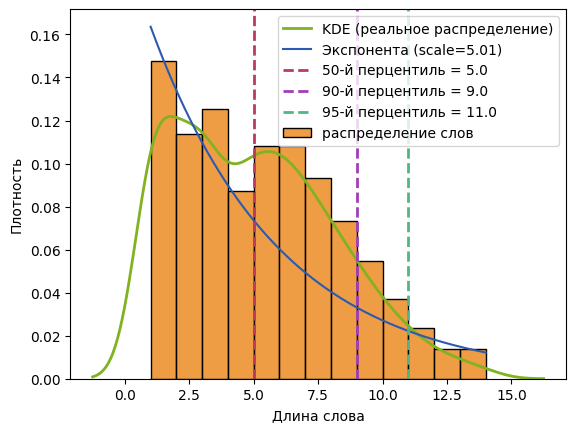

In [69]:
scale = np.mean(word_len)

sns.histplot(word_len, binwidth=1, stat='density', label='распределение слов', color="#EA7C07")
sns.kdeplot(word_len, bw_adjust=3.0, color='#81B21F', label='KDE (реальное распределение)', linewidth=2)

x = np.linspace(1, word_len.max(), 1000)

y = expon.pdf(x, scale=scale)
p50 = np.percentile(word_len, 50)
p90 = np.percentile(word_len, 90)
p95 = np.percentile(word_len, 95)

plt.plot(x, y, 'r-', label=f'Экспонента (scale={scale:.2f})', color="#2C5AAF")
plt.axvline(x=p50, color='#B93C5D', linestyle='--', linewidth=2, label=f'50-й перцентиль = {p50:.1f}')
plt.axvline(x=p90, color='#A23CB9', linestyle='--', linewidth=2, label=f'90-й перцентиль = {p90:.1f}')
plt.axvline(x=p95, color='#52B684', linestyle='--', linewidth=2, label=f'95-й перцентиль = {p95:.1f}')
plt.xlabel('Длина слова')
plt.ylabel('Плотность')
plt.legend()
plt.show()

In [70]:
max_word_symb = 5
min_word_shingle = 3

In [85]:
max_word_symb*min_word_shingle

15

In [97]:
shingles_list = [get_shingles(elem, k=8) for elem in corpus]

In [135]:
len(shingles_list[0])

238

In [137]:
shingles_list[0]

{'   «Анна',
 '  «Анна ',
 ' «Анна К',
 ' Каренин',
 ' Л.Н. То',
 ' России ',
 ' Толстой',
 ' в Росси',
 ' времени',
 ' жизни в',
 ' как руш',
 ' на стра',
 ' насыщен',
 ' остатки',
 ' остропр',
 ' патриар',
 ' под нат',
 ' показыв',
 ' примета',
 ' произве',
 ' психоло',
 ' рушатся',
 ' сложное',
 ' страниц',
 ' уклада ',
 ' утончен',
 ' это сло',
 ' – это с',
 ', как ру',
 ', насыще',
 ', остроп',
 ', психол',
 '. Л.Н. Т',
 '. Толсто',
 '.Н. Толс',
 'Annotati',
 'ation   ',
 'ion   «А',
 'n   «Анн',
 'nnotatio',
 'notation',
 'on   «Ан',
 'otation ',
 'tation  ',
 'tion   «',
 '«Анна Ка',
 '» – это ',
 'Анна Кар',
 'Каренина',
 'Л.Н. Тол',
 'Н. Толст',
 'России п',
 'Толстой ',
 'а Карени',
 'а жизни ',
 'а страни',
 'а» – это',
 'ада жизн',
 'ает, как',
 'азывает,',
 'ак рушат',
 'ального ',
 'ами врем',
 'аницах п',
 'аренина»',
 'архально',
 'асыщенно',
 'атки пат',
 'атриарха',
 'атся ост',
 'ах произ',
 'блемное ',
 'в России',
 'вает, ка',
 'ведение,',
 'ведения ',
 'времени.',

In [177]:
def hash_string(s):
    """хеширует строку и возвращает число"""
    return int(hashlib.md5(s.encode('utf8')).hexdigest(), 16)

def generate_hash_functions(k):
    """генерирует k хеш-функций добавляя индекс к строке"""

    functions = []
    for i in range(k):
        functions.append(lambda x, i=i: hash_string(x + str(i)))
    return functions

In [178]:
def compute_minhash_signature(shingles, hash_funcs):
    """вычисляет minhash-сигнатуру для списка шинглов"""
    signature = []
    for hash_func in hash_funcs:
        min_hash = min(hash_func(shingle) for shingle in shingles)
        signature.append(min_hash)
    return signature

In [179]:
def lsh(signatures, bands):
    """Разрезает сигнатуры на куски (bands), и группирует индексы сигнатур по совпадению кусков"""
    buckets = defaultdict(list)
    band_length = len(signatures[0]) // bands

    for idx, sig in enumerate(signatures):
        for band_idx in range(bands):
            start = band_idx * band_length
            end = start + band_length
            band = tuple(sig[start:end])
            buckets[(band_idx, band)].append(idx)
    return buckets

In [180]:
def find_similar_strings(strings_list, k=5, num_hashes=100, bands=20):
    hash_funcs = generate_hash_functions(num_hashes)
    signatures = []
    shingles_list = []

    for string in tqdm(strings_list):
        shingles = get_shingles(string, k)
        shingles_list.append(shingles)
        signature = compute_minhash_signature(shingles, hash_funcs)
        signatures.append(signature)

    buckets = lsh(signatures, bands)
    candidates = set()
    for bucket in buckets.values():
        if len(bucket) > 1:
            for i in range(len(bucket)):
                for j in range(i+1, len(bucket)):
                    candidates.add((bucket[i], bucket[j]))
    return candidates

In [143]:
sim_strings = find_similar_strings(corpus, k=6,
                                   num_hashes=48, bands=16)

  0%|          | 0/3200 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [144]:
sim_strings

{(12, 13),
 (14, 964),
 (60, 1865),
 (68, 2946),
 (81, 2347),
 (211, 926),
 (395, 1441),
 (496, 630),
 (498, 3118),
 (558, 2236),
 (572, 1293),
 (572, 1805),
 (705, 2921),
 (848, 877),
 (875, 2813),
 (942, 2108),
 (986, 2393),
 (1096, 3148),
 (1185, 2638),
 (1293, 1805),
 (1423, 2118),
 (1507, 1798),
 (1571, 2423),
 (1574, 1875),
 (1678, 2938),
 (1801, 1809),
 (1823, 2684),
 (1862, 2391),
 (1906, 3040),
 (2225, 3138),
 (2498, 2820),
 (2632, 2828),
 (2971, 2973)}

In [153]:
def compute_jaccard_for_candidates(texts, candidates, shingle_size=11):
    jaccard_scores = {}
    for i, j in candidates:
        if i == j:
            score = 1.0
        else:
            set_i = get_shingles(texts[i], shingle_size)
            set_j = get_shingles(texts[j], shingle_size)

            if not set_i and not set_j:
                score = 1.0
            elif not set_i or not set_j:
                score = 0.0
            else:
                intersection = set_i & set_j
                union = set_i | set_j
                score = len(intersection) / len(union)
        jaccard_scores[(i, j)] = score

    if jaccard_scores:
        avg_jaccard = round(sum(jaccard_scores.values()) / len(jaccard_scores), 5)
    else:
        avg_jaccard = 0.0
    return jaccard_scores, avg_jaccard

In [146]:
len(sim_strings)

33

In [147]:
compute_jaccard_for_candidates(corpus, sim_strings)

({(572, 1293): 0.0,
  (1423, 2118): 0.0,
  (1862, 2391): 0.0,
  (848, 877): 0.0,
  (875, 2813): 0.0,
  (60, 1865): 0.0,
  (12, 13): 0.0,
  (705, 2921): 0.0,
  (1574, 1875): 0.0,
  (2225, 3138): 0.0,
  (572, 1805): 0.0,
  (68, 2946): 0.0,
  (2971, 2973): 0.0,
  (211, 926): 0.0,
  (1678, 2938): 0.0010559662090813093,
  (1906, 3040): 0.0,
  (558, 2236): 0.0,
  (14, 964): 0.0,
  (498, 3118): 0.0,
  (986, 2393): 0.0,
  (1801, 1809): 0.0,
  (2498, 2820): 0.0,
  (81, 2347): 0.0,
  (1571, 2423): 0.0,
  (1185, 2638): 0.0,
  (1293, 1805): 0.0,
  (1507, 1798): 0.0,
  (1823, 2684): 0.0,
  (496, 630): 0.0,
  (942, 2108): 0.0,
  (2632, 2828): 0.0,
  (1096, 3148): 0.0,
  (395, 1441): 0.0},
 3e-05)

В большинстве случаев подбора параметров:

- либо не находятся вообще;
- либо находятся, но только по сути один кандидат с Жаккаром в 0.001

In [210]:
new_corpus = [text for text in [full_text[150*k-150:150*k] for k in range(1, 10000)]]

In [212]:
random_new = random.sample(new_corpus, 5000)

In [213]:
hash_funcs = generate_hash_functions(40)
signatures = []
shingles_list = []
for chunk in tqdm(random_new):
    shingles = get_shingles(chunk, k=8)
    shingles_list.append(shingles)
    signature = compute_minhash_signature(shingles, hash_funcs)
    signatures.append(signature)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [218]:
buckets = lsh(signatures, bands=12)
candidates = set()
for bucket in buckets.values():
    if len(bucket) > 1:
        print(len(bucket))
        for i in range(len(bucket)):
            for j in range(i+1, len(bucket)):
                candidates.add((bucket[i], bucket[j]))
len(candidates)

2
2
2
2
4
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2


30

In [219]:
compute_jaccard_for_candidates(random_new, candidates)

({(706, 2093): 0.05747126436781609,
  (1232, 4387): 0.0036101083032490976,
  (706, 4591): 0.06563706563706563,
  (597, 2280): 0.007194244604316547,
  (1849, 4587): 0.037037037037037035,
  (1286, 4290): 0.04477611940298507,
  (1298, 1744): 0.014492753623188406,
  (929, 2612): 0.037037037037037035,
  (453, 1850): 0.014492753623188406,
  (2699, 2965): 0.05660377358490566,
  (2314, 2407): 0.021897810218978103,
  (1524, 4237): 0.05660377358490566,
  (597, 4387): 0.0035842293906810036,
  (1662, 2386): 0.06463878326996197,
  (3974, 4645): 0.05263157894736842,
  (1424, 3033): 0.05263157894736842,
  (217, 4630): 0.010830324909747292,
  (1232, 2280): 0.0036101083032490976,
  (203, 4341): 0.014492753623188406,
  (1319, 2440): 0.0,
  (597, 1232): 0.01090909090909091,
  (896, 1653): 0.007194244604316547,
  (2247, 4903): 0.0035842293906810036,
  (2393, 4084): 0.09375,
  (3033, 3871): 0.06060606060606061,
  (592, 3377): 0.041044776119402986,
  (1574, 2129): 0.010830324909747292,
  (2093, 4591): 0.056

С уменьшением размера строки получился результат получше, но насколько оно здесь, конечно, репрезентативно – под вопросом (скорее, нет).